Objective of this experiment: compare three topologies with all-shortest-path routing

networks included: 

========slimfly==========: 

(722, 28), (1058, 34)

========jellyfish and GDBG========:

(722, 28), (800,31), (900,32), (1058, 34)

========Equality=========: 

E441: N900k32p12 ahops:[−1,1,23,25,55,121,135,165,177,333,457,475,495,543,549,557,585,615,717, 727] bhops:(70,130,194,256,320,360)

E442: N1000k33p11 ahops:[−1, 1, 27, 39, 45, 105, 215, 327, 365, 401, 455, 491, 523, 545, 547, 605, 653, 701, 715, 771, 801, 813, 865, 875, 955] bhops:(70, 180, 320, 430)

E443 (fault on the Equality paper!): N800k31p13 ahops:[−1, 1, 27, 39, 45, 105, 215, 327, 365, 401, 455, 491, 523, 545, 547, 605, 653, 701, 715, 771, 801, 813, 865, 875, 955] bhops:(70, 180, 320, 430)



In [1]:
import matplotlib.pyplot as plt
# import networkx as nx
# import topologies.Equality as Equality
# import topologies.RRG as RRG
# import topologies.Slimfly as Slimfly
from globals import *
from statistics import mean

The pickled data structure is a dictionary:

"diameter": diameter, 

"ave_path_length_statistics": [average_path_length_min, average_path_length_mean, average_path_length_max],

"link_load_statistics": [load_min, load_mean, load_max]

key of the dictionary is the |V| for slimfly, (|V|, D) for jellyfish, and E44x for equality

In [2]:
import pickle
sf_results = pickle.load(open('pickled_data/all_shortest_paths_slimfly.pickle', 'rb'))
jf_results = pickle.load(open('pickled_data/all_shortest_paths_jellyfish.pickle', 'rb'))
eq_results = pickle.load(open('pickled_data/all_shortest_paths_equality.pickle', 'rb'))

# 1. Diameter

In [3]:
for sf in sf_configs:
    print(f"diameter of Slimfly_{sf} is {sf_results[sf]['diameter']}")
for jf in jf_configs:
    print(f"diameter of Jellyfish_{jf} is {jf_results[jf]['diameter']}")
for eq in eq_configs:
    print(f"diameter of Equality_{eq[-1]} is {eq_results[eq[-1]]['diameter']}")
    

diameter of Slimfly_722 is 2
diameter of Slimfly_1058 is 2
diameter of Jellyfish_(722, 28) is 3
diameter of Jellyfish_(800, 31) is 3
diameter of Jellyfish_(900, 32) is 3
diameter of Jellyfish_(1058, 34) is 3
diameter of Equality_E441 is 3
diameter of Equality_E442 is 3


# 2. Average path lengths

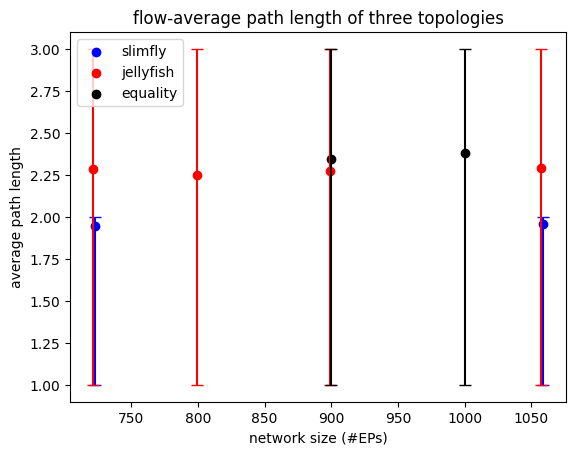

In [6]:
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in sf_configs:
    x_.append(config+1)
    (_min, _ave, _max) = sf_results[config]['ave_path_length_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='blue', label='slimfly')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='blue', capsize=4)

x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in jf_configs:
    x_.append(config[0]-1)
    (_min, _ave, _max) = jf_results[config]['ave_path_length_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='red', label='jellyfish')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='red', capsize=4)


x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in eq_configs:
    x_.append(config[0])
    (_min, _ave, _max) = eq_results[config[-1]]['ave_path_length_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='black', label='equality')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='black', capsize=4)

# Add labels and title
plt.xlabel('network size (#EPs)')
plt.ylabel('average path length')
plt.title('flow-average path length of three topologies')
plt.legend(loc='upper left')
# Show the plot
plt.show()

# 3. Link load distribution

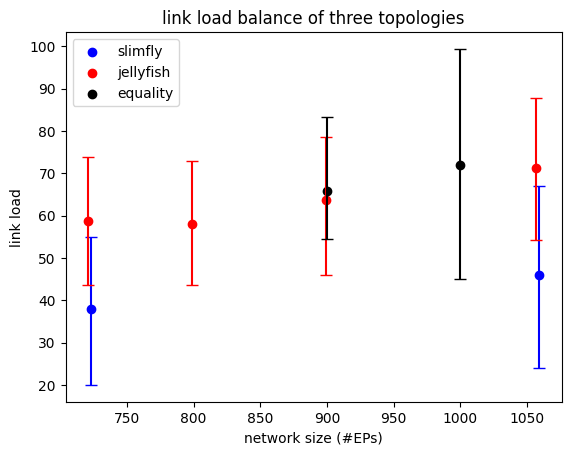

In [7]:
x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in sf_configs:
    x_.append(config+1)
    (_min, _ave, _max) = sf_results[config]['link_load_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='blue', label='slimfly')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='blue', capsize=4)

x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in jf_configs:
    x_.append(config[0]-1)
    (_min, _ave, _max) = jf_results[config]['link_load_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='red', label='jellyfish')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='red', capsize=4)


x_ = []
y_ave_ = []
y_min_ = []
y_max_ = []
for config in eq_configs:
    x_.append(config[0])
    (_min, _ave, _max) = eq_results[config[-1]]['link_load_statistics']
    y_min_.append(_min)
    y_ave_.append(_ave)
    y_max_.append(_max)
# Create the scatter plot
plt.scatter(x_, y_ave_, color='black', label='equality')
# Create the error bars
for i in range(len(x_)):
    plt.errorbar(x_[i], y_ave_[i], yerr=[[y_ave_[i]-y_min_[i]], [y_max_[i]-y_ave_[i]]], fmt='none', ecolor='black', capsize=4)

# Add labels and title
plt.xlabel('network size (#EPs)')
plt.ylabel('link load')
plt.title('link load balance of three topologies')
plt.legend(loc='upper left')
# Show the plot
plt.show()